In [1]:
import os
from os.path import isfile,join
from skimage.io import imread, imsave
from matplotlib.pyplot import imshow
import numpy as np
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity
from skimage.util import random_noise
from skimage import transform

In [2]:
class Blur:
    def __init__(self, sigma):
        self.sigma = sigma
        self.code = 'blur' + str(sigma)

    def process(self, img):
        is_colour = len(img.shape)==3
        return rescale_intensity(gaussian(img, sigma=self.sigma, channel_axis=is_colour))
    
class FlipH:
    def __init__(self):
        self.code = 'fliph'

    def process(self, img):
        return np.fliplr(img)
    
class FlipV:
    def __init__(self):
        self.code = 'flipv'

    def process(self, img):
        return np.flipud(img)
    
class Noise:
    def __init__(self, var):
        self.var = var
        self.code = 'noise' + str(var)

    def process(self, img):
        return random_noise(img, mode='gaussian', var=self.var)
    
class Rotate:
    def __init__(self, angle):
        self.angle = angle
        self.code = 'rotate' + str(angle)

    def process(self, img):
        return transform.rotate(img, -self.angle)

class Zoom:
    def __init__(self, p1x, p1y, p2x, p2y):
        self.p1x = p1x
        self.p1y = p1y
        self.p2x = p2x
        self.p2y = p2y
        self.code = 'zoom'

    def process(self, img):
        h = len(img)
        w = len(img[0])

        crop_p1x = max(self.p1x, 0)
        crop_p1y = max(self.p1y, 0)
        crop_p2x = min(self.p2x, w)
        crop_p2y = min(self.p2y, h)

        cropped_img = img[crop_p1y:crop_p2y, crop_p1x:crop_p2x]

        x_pad_before = -min(0, self.p1x)
        x_pad_after  =  max(0, self.p2x-w)
        y_pad_before = -min(0, self.p1y)
        y_pad_after  =  max(0, self.p2y-h)

        padding = [(y_pad_before, y_pad_after), (x_pad_before, x_pad_after)]
        is_colour = len(img.shape) == 3
        if is_colour:
            padding.append((0,0)) # colour images have an extra dimension

        padded_img = np.pad(cropped_img, padding, 'constant')
        return transform.resize(padded_img, (h,w))

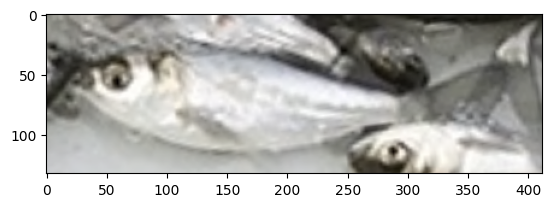

In [3]:
img_path = 'SilverCarp/silver_carp0.png'
img = imread(img_path)
img_aug_path = 'SilverCarp_aug'
imshow(img)

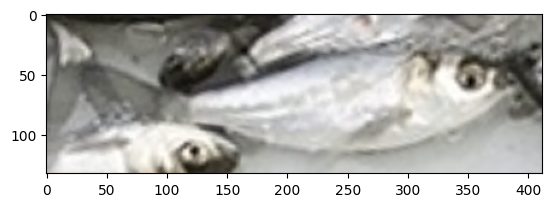

In [4]:
img_path = 'SilverCarp/silver_carp0.png'
img = imread(img_path)
img_aug_path = 'SilverCarp_aug'

out_file_name = 'silver_carp0_fliph'
op = FlipH()
new_img = op.process(img)
imshow(new_img)

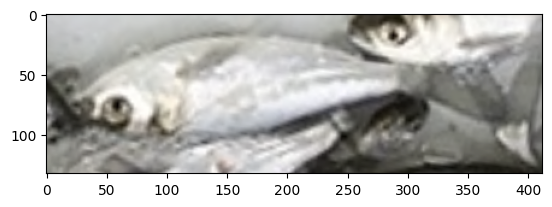

In [5]:
op = FlipV()
new_img = op.process(img)
imshow(new_img)

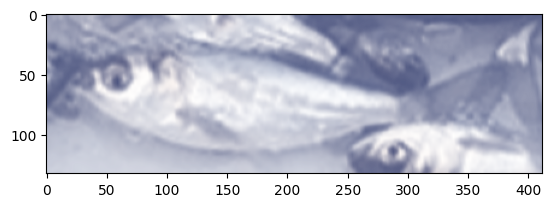

In [6]:
op = Blur(1.0)
new_img = op.process(img)
imshow(new_img)

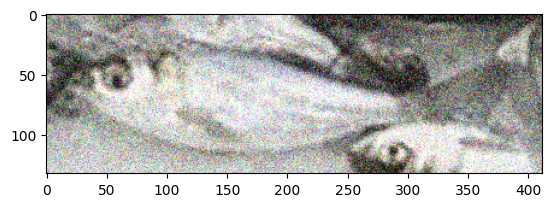

In [7]:
op = Noise(0.02)
new_img = op.process(img)
imshow(new_img)

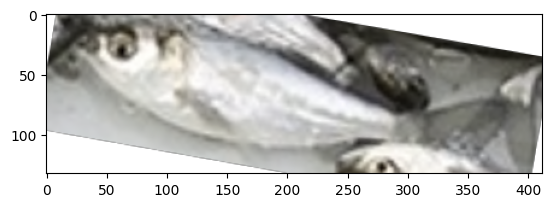

In [8]:
op = Rotate(10)
new_img = op.process(img)
imshow(new_img)

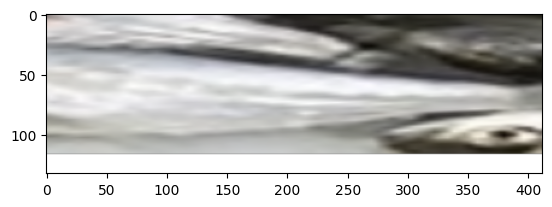

In [9]:
op = Zoom(150, 0, 300, 150)
new_img = op.process(img)
imshow(new_img)

In [10]:
def build_augmented_file_name(original_name, op):
    root, ext = os.path.splitext(original_name)
    result = root
    result += '_' + op.code
    return result + ext

In [15]:
# run this block to do image augmentation

oplist = [Blur(1.0), Blur(2.0), Blur(4.0), Rotate(5), Rotate(10), Rotate(-5), Rotate(-10), Noise(0.02), Noise(0.05)]

img_path = '../resized_data/SilverCarp_fixed'
img_aug_path = '../dataset/SilverCarp_aug'

# img_path = '../resized_data/Pomfret_fixed'
# img_aug_path = '../dataset/Pomfret_aug'

# img_path = '../resized_data/Tincaeus_fixed'
# img_aug_path = '../dataset/Tincaeus_aug'

for item in os.listdir(img_path):
    root, ext = os.path.splitext(item)
    if (ext != '.png'):
        continue
    in_path = os.path.join(img_path,item)
    # img = imread(in_path)
    try:
        img = imread(in_path)
    except Exception as someReadingError:
        print(someReadingError)
    for op in oplist:
        out_file_name = build_augmented_file_name(item, op)
        out_path = os.path.join(img_aug_path,out_file_name)
        if not isfile(out_path):
            new_img = op.process(img)
            imsave(out_path, (255*new_img).astype(np.uint8))

In [12]:
# when pushing to github, run this block
import shutil

shutil.rmtree('../dataset/SilverCarp_aug', ignore_errors=True)
shutil.rmtree('../dataset/Pomfret_aug', ignore_errors=True)
shutil.rmtree('../dataset/Tincaeus_aug', ignore_errors=True)

os.mkdir('../dataset/SilverCarp_aug')
os.mkdir('../dataset/Pomfret_aug')
os.mkdir('../dataset/Tincaeus_aug')